<h2>Find matches in lambda virus genome</h2>
<hr>
<p>Week 1 homework from <a href="https://www.coursera.org/learn/dna-sequencing/home/welcome">Algorithms for DNA sequencing</a></p>

In [1]:
# function to read genome (imported from course module)
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

# get genome
genome = readGenome('lambda_virus.fa')
genome[:100]

'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACC'

In [2]:
#function to find exact matches (imported from course module)
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):
        match = True
        for j in range(len(p)):
            if t[i+j] != p[j]:
                match = False
                break
        if match:
            occurrences.append(i)
    return occurrences

In [3]:
#function to get complementary strand of sequence (imported from course module)
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

### Question 1
How many times does AGGT or its reverse complement TCCA occur in the lambda virus genome?  
E.g. if AGGT occurs 10 times and TCCA occurs 12 times, you should report 22

In [7]:
pattern = "AGGT"
matches = naive(pattern, genome)
matches.extend(naive(reverseComplement(pattern), genome))
numMatched = len(matches)
print(pattern + ' occurs %d times!' % (numMatched))

AGGT occurs 306 times!


### Question 2
How many times does TTAA or its reverse complement occur in the lambda virus genome?  
Hint: TTAA and its reverse complement are equal, so remember not to double count

In [16]:
#function to look for matches to a pattern and the complementary strand in genome
def strandAwareNaive(p, t): 
    matches = naive(p, t)
    reverse_pattern = reverseComplement(p)
    if p != reverse_pattern:
        matches.extend(naive(reverse_pattern, t))
    return matches

pattern = "TTAA"
matches = strandAwareNaive(pattern, genome)
numMatched = len(matches)
print(pattern + ' occurs %d times!' % (numMatched))

TTAA occurs 195 times!


### Question 3
What is the offset of the leftmost occurrence of ACTAAGT or its reverse complement in the Lambda virus genome?  
E.g. if the leftmost occurrence of ACTAAGT is at offset 40 (0-based) and the leftmost occurrence of its reverse complement is at offset 29, then report 29.

In [14]:
pattern = "ACTAAGT"
matches = strandAwareNaive(pattern, genome)
leftmostOccurence = min(matches)
print('The leftmost occurrence of ' + pattern + ' is at offset %d!' % (leftmostOccurence))

The leftmost occurrence of ACTAAGT is at offset 26028!


### Question 4
What is the offset of the leftmost occurrence of AGTCGA or its reverse complement in the Lambda virus genome?

In [15]:
pattern = "AGTCGA"
matches = strandAwareNaive(pattern, genome)
leftmostOccurence = min(matches)
print('The leftmost occurrence of ' + pattern + ' is at offset %d!' % (leftmostOccurence))

The leftmost occurrence of AGTCGA is at offset 450!


<h3 style="border-bottom: 1px solid">Function naive_2mm()</h3>

> We would like to find approximate matches for P in T. That is, we want to find occurrences with one or more differences.
For Questions 5 and 6, make a new version of the naive function called naive_2mm that allows up to 2 mismatches per occurrence. Unlike for the previous questions, do not consider the reverse complement here.  We're looking for approximate matches for P itself, not its reverse complement.
For example, ACTTTA occurs twice in ACTTACTTGATAAAGT, once at offset 0 with 2 mismatches, and once at offset 4 with 1 mismatch. So naive_2mm(’ACTTTA’, ’ACTTACTTGATAAAGT’) should return the list [0, 4]


In [17]:
#function to find approximate matches : allows 2 mismatches
def naive_2mm(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):
        match = True
        count_missMatch = 0
        for j in range(len(p)):
            if t[i+j] != p[j]:
                count_missMatch += 1
            if count_missMatch > 2:
                match = False
                break
        if match:
            occurrences.append(i)
    return occurrences

<div class="alert alert-block alert-info"> Function tests</div>

In [29]:
#test function 
print(naive_2mm("atca", "atgaccgtt"))
print(naive_2mm("atca", "acgtt"))

[0, 3]
[]


<div class="alert alert-block alert-success">Test 1 from module</div>

In [30]:
p = 'CTGT'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CTGT' + ten_as + 'CTTT' + ten_as + 'CGGG' + ten_as
occurrences = naive_2mm(p, t)
print(occurrences)

[10, 24, 38]


<div class="alert alert-block alert-success">Test 2 from module</div>

In [31]:
phix_genome = readGenome('phix.fa')
occurrences = naive_2mm('GATTACA', phix_genome)
print('offset of leftmost occurrence: %d' % min(occurrences))

offset of leftmost occurrence: 10


### Question 5
How many times does TTCAAGCC occur in the Lambda virus genome when allowing up to 2 mismatches?

In [28]:
pattern = "TTCAAGCC"
matches = naive_2mm(pattern, genome)
numMatched = len(matches)
print(pattern + ' occurs %d times!' % (numMatched))

TTCAAGCC occurs 191 times!


### Question 6
What is the offset of the leftmost occurrence of AGGAGGTT in the Lambda virus genome when allowing up to 2 mismatches?

In [32]:
pattern = "AGGAGGTT"
occurrences = naive_2mm('GATTACA', genome)
print('Offset of leftmost occurrence of '+ pattern +': %d' % min(occurrences))

Offset of leftmost occurrence of AGGAGGTT: 214


<h2>Sequence quality check</h2>
<hr>

The reads below are taken from this study:

> **Ajay, S. S., Parker, S. C., Abaan, H. O., Fajardo, K. V. F., & Margulies, E. H.** (2011). Accurate and comprehensive sequencing of personal genomes. Genome research, 21(9), 1498-1505. 

### Question 7
This dataset has something wrong with it. One of the sequencing cycles is poor quality.
Report which sequencing cycle has the problem.  Remember that a sequencing cycle corresponds to a particular offset in all the reads. For example, if the leftmost read position seems to have a problem consistently across reads, report 0. If the fourth position from the left has the problem, report 3. Do whatever analysis you think is needed to identify the bad cycle. 
Note that the file has many reads in it and you should examine all of them together when answering this question.  

In [35]:
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

--2022-11-30 21:17:15--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 65.9.58.198, 65.9.58.64, 65.9.58.79, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|65.9.58.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq’

ERR037900_1.first10  19%[==>                 ]  47.11K  --.-KB/s    in 3m 36s  

2022-11-30 21:21:24 (223 B/s) - Read error at byte 48240/241626 (Error in the pull function.). Retrying.

--2022-11-30 21:21:25--  (try: 2)  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|65.9.58.198|:443... connected.
HTTP request sent, awaiting response... 206 Partial Content
Length: 241626

In [40]:
## function to read fastq file (imported from course module)
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() #base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities


In [48]:
##read fastq data
_, quals = readFastq('ERR037900_1.first1000.fastq')
len(quals)
print(quals[0][:100])

HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGFHHHFHFFHHHHHGHHFHEH@4#55554455HGFBF<@C>7EEF@FBEDDD<=C<E


In [49]:
#function to convert quality characters into integers (imported from course module)
def phred33ToQ(qual):
    return ord(qual) - 33

In [50]:
def getPhread(qualityStrings):
    #reads in each line
    readLength = [len(read) for read in quals]
    #max number of nts in one line
    max_bases = max(readLength)
    
    result = [0] * max_bases
    for read in qualityStrings:
        for i, phred in enumerate(read):
            #transforme characters into read quality values
            q = phred33ToQ(phred)
            #add read quality per nt position
            result[i] += q
    
    #get average quality read for each position accross clusters
    numb_clusters = len(qualityStrings)
    for i,q in enumerate(result):
        result[i] /= numb_clusters
        
    return result

In [53]:
phredList = getPhread(quals)
print(phredList)

[38.435, 38.46, 38.4, 38.428, 38.417, 38.382, 38.362, 38.364, 38.325, 38.343, 38.194, 38.154, 38.089, 38.152, 38.153, 38.099, 38.055, 38.041, 38.067, 38.15, 38.087, 37.989, 38.009, 37.909, 38.028, 37.576, 37.514, 37.503, 37.578, 37.552, 37.629, 37.555, 37.548, 37.433, 37.402, 37.343, 37.198, 37.126, 37.158, 36.904, 36.742, 36.677, 36.645, 36.493, 36.509, 36.375, 36.205, 35.974, 35.847, 35.673, 34.832, 34.739, 34.399, 34.402, 34.025, 33.025, 32.882, 32.741, 32.573, 32.224, 30.805, 30.666, 30.343, 30.131, 29.463, 17.891, 4.526, 17.881, 17.865, 17.852, 17.466, 17.131, 17.134, 17.098, 16.852, 23.745, 23.958, 23.221, 22.902, 22.366, 20.904, 20.584, 20.383, 19.767, 19.095, 18.061, 17.757, 17.152, 16.972, 16.286, 14.811, 14.679, 14.31, 14.152, 13.734, 12.538, 12.278, 12.179, 11.676, 11.561]


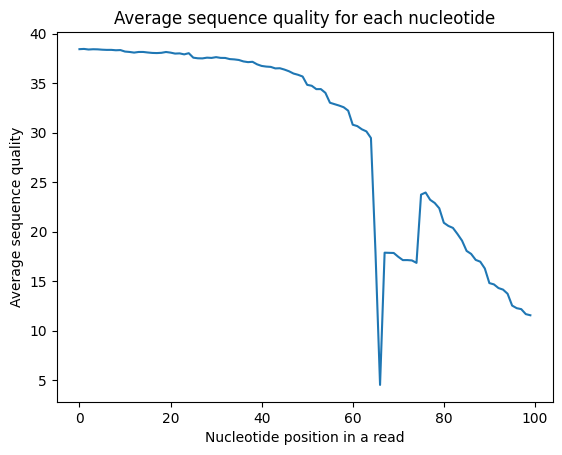

In [67]:
#bar plot result
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(phredList)), phredList)
plt.title("Average sequence quality for each nucleotide")
plt.ylabel("Average sequence quality")
plt.xlabel("Nucleotide position in a read")
plt.show()

In [63]:
lowest_result = min(phredList)
lowest_result_occurence = [i for i, x in enumerate(phredList) if x==lowest_result]
print('The sequencing cycle with a problem is : %d' % min(lowest_result_occurence))

The sequencing cycle with a problem is : 66
